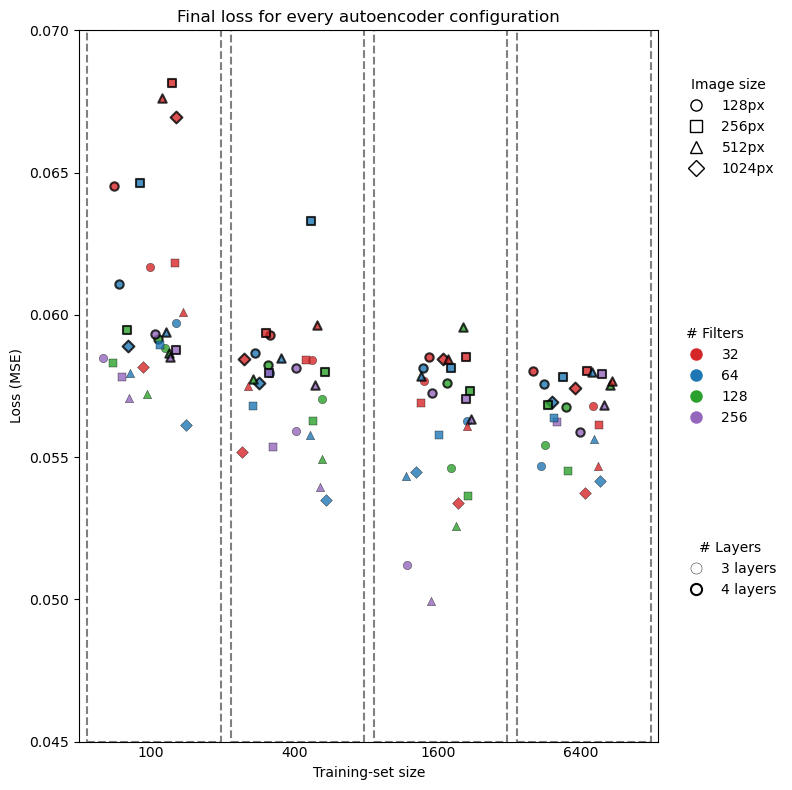

In [18]:
import json, random, pathlib, matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

BASE   = pathlib.Path("/scratch/ahmad9/caserm/train")          # adjust if needed
PARENT = [100, 400, 1600, 6400] 
# PARENT = [100]         # outer folders

# -------------------------------------------------------------------
# 1) visual dictionaries
# -------------------------------------------------------------------
# COLOR_BY_PARENT = {100:"tab:red", 400:"tab:blue",
                #    1600:"tab:green", 6400:"tab:purple"}

SHAPE_BY_IMG = {128:"o", 256:"s", 512:"^", 1024:"D"}          # marker
COLOR_BY_FILT = {32:"tab:red", 64:"tab:blue", 128:"tab:green", 256:"tab:purple"}                # pts^2
LW_BY_LAYER  = {3:0.3, 4:1.5}                          # edge lw

fig, ax = plt.subplots(figsize=(8, 8))

# -------------------------------------------------------------------
# 2) loop over all models
# -------------------------------------------------------------------
for n in PARENT:
    parent = BASE / f"model{n}"
    for cfg in parent.iterdir():                 # e.g. "128.64.3"
        # print(cfg.name)
        if str(cfg.name).strip().endswith(".2"):
            continue
        else:
            try:
                img_sz, filt, layers = map(int, cfg.name.split("."))
                # print(layers)
            except ValueError:
                continue  # name not in expected pattern

            auto_dir = cfg / "autoencoder"
            try:
                hist_path = next(auto_dir.glob("history*.json"))
            except StopIteration:
                continue

            with open(hist_path) as f:
                loss = json.load(f)["loss"][-1]      # final train-loss

            # jitter x so dots don’t hide each other
            x = n + random.uniform(-0.4 * n, 0.4 * n)

            plt.scatter(
                x, loss,
                c=COLOR_BY_FILT[filt],
                marker=SHAPE_BY_IMG[img_sz],
                linewidths=LW_BY_LAYER[layers],
                edgecolors="k",
                alpha=0.8
            )

# -------------------------------------------------------------------
# 3) build four separate legend blocks
# -------------------------------------------------------------------
# Parent dirs – color dots
# parent_handles = [
#     mlines.Line2D([], [], marker="o", ms=8, color=clr, linestyle="",
#                   label=f"model{p}") for p, clr in COLOR_BY_PARENT.items()
# ]

# Image sizes – shape only
img_handles = [
    mlines.Line2D([], [], marker=shape, ms=8, color="w", mec="k",
                  linestyle="", label=f"{sz}px")
    for sz, shape in SHAPE_BY_IMG.items()
]

# Filters – marker size
filt_handles = [
    mlines.Line2D([], [], marker="o", ms=8, color=clr, linestyle="",
                  label=f"{p}") for p, clr in COLOR_BY_FILT.items()
]            # placeholder
# for h, (f, s) in zip(filt_handles, SIZE_BY_FILT.items()):
#     h.set_alpha(0.0)                # invisible, we'll tweak later
#     h.set_edgecolor("none")
#     h.set_facecolor("none")
#     h.set_linewidth(0)
#     h.set_label(f"{f} filters")
#     h._sizes = [s]                  # sizes proxy (Matplotlib quirk)

# Layers – edge width
layer_handles = [
    mlines.Line2D([], [], marker="o", ms=8, mec="k", mew=lw,
                  color="w", linestyle="", label=f"{l} layers")
    for l, lw in LW_BY_LAYER.items()
]

fig.subplots_adjust(right=0.70)

# -------------------------------------------------------------------
# 4) final plot cosmetics
# -------------------------------------------------------------------
plt.xlabel("Training-set size")
plt.ylabel("Loss (MSE)")
# plt.xticks(PARENT)
plt.title("Final loss for every autoencoder configuration")

plt.xscale("log")        # ← log-10 axis
plt.xlim(50, 13500)      # ← span from 80 to 65 000
plt.ylim(0.045, 0.07) 
plt.xticks([100, 400, 1600, 6400] , [100, 400, 1600, 6400] )   # optional: keep ticks at 100,400,1600,6400

# Place the legends; one below the other keeps clutter down
# first_legend  = plt.legend(handles=parent_handles, title="Parent dir",
                        #    loc="upper right", frameon=False)
second_legend = plt.legend(handles=img_handles,    title="Image size",
                           bbox_to_anchor=(1.02, 0.95), loc="upper left", frameon=False)
third_legend  = plt.legend(handles=filt_handles,   title="# Filters",
                           bbox_to_anchor=(1.02, 0.6), loc="upper left", frameon=False)
fourth_legend = plt.legend(handles=layer_handles,  title="# Layers",
                           bbox_to_anchor=(1.02, 0.3), loc="upper left", frameon=False)

# plt.gca().add_artist(first_legend)   # keep first legend when adding others
plt.gca().add_artist(second_legend)
plt.gca().add_artist(third_legend)
plt.gca().tick_params(axis='x', which='both', length=0)

plt.tight_layout()


# add dashed columns
import matplotlib.transforms as transforms
from matplotlib.patches import Rectangle

frac = 0.46   
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for n in PARENT:
    left, right = n*(1-frac), n*(1.5+frac)
    ax.add_patch(Rectangle((left, 0), right-left, 1,
                           transform=trans, fill=False, lw=1.5,
                           linestyle='--', ec='0.5', zorder=0))
    
    
plt.show()


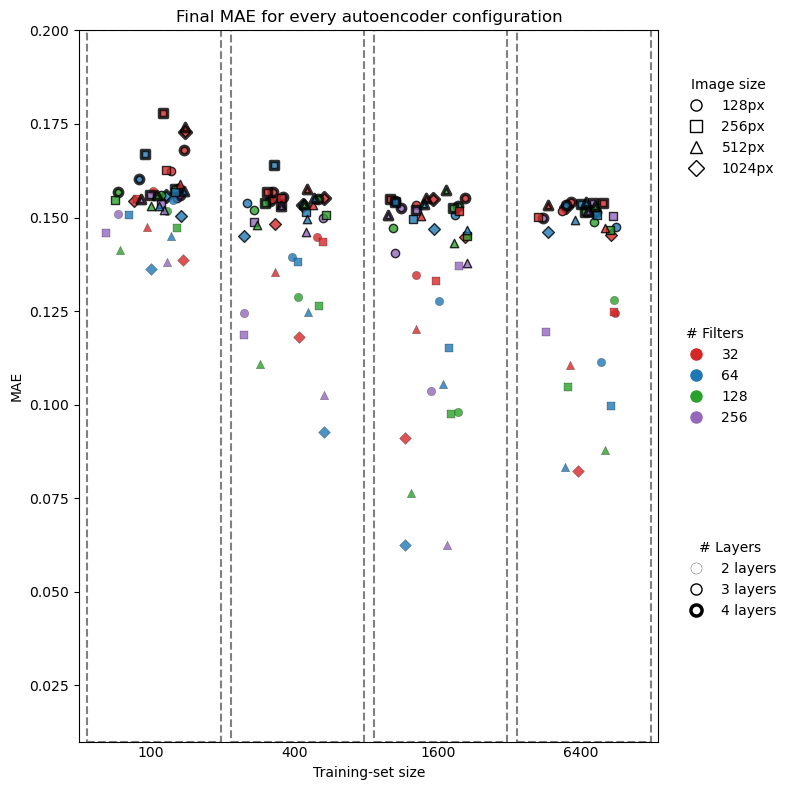

In [6]:
import json, random, pathlib, matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

BASE   = pathlib.Path("/scratch/ahmad9/caserm/train")          # adjust if needed
PARENT = [100, 400, 1600, 6400] 
# PARENT = [100]         # outer folders

# -------------------------------------------------------------------
# 1) visual dictionaries
# -------------------------------------------------------------------
# COLOR_BY_PARENT = {100:"tab:red", 400:"tab:blue",
                #    1600:"tab:green", 6400:"tab:purple"}

SHAPE_BY_IMG = {128:"o", 256:"s", 512:"^", 1024:"D"}          # marker
COLOR_BY_FILT = {32:"tab:red", 64:"tab:blue", 128:"tab:green", 256:"tab:purple"}                # pts^2
LW_BY_LAYER  = {2:0.2, 3:1, 4:2.5}                          # edge lw

fig, ax = plt.subplots(figsize=(8, 8))

# -------------------------------------------------------------------
# 2) loop over all models
# -------------------------------------------------------------------
for n in PARENT:
    parent = BASE / f"model{n}"
    for cfg in parent.iterdir():                 # e.g. "128.64.3"
        try:
            img_sz, filt, layers = map(int, cfg.name.split("."))
        except ValueError:
            continue  # name not in expected pattern

        auto_dir = cfg / "autoencoder"
        try:
            hist_path = next(auto_dir.glob("history*.json"))
        except StopIteration:
            continue

        with open(hist_path) as f:
            loss = json.load(f)["mae"][-1]      # final train-loss

        # jitter x so dots don’t hide each other
        x = n + random.uniform(-0.4 * n, 0.4 * n)

        plt.scatter(
            x, loss,
            c=COLOR_BY_FILT[filt],
            marker=SHAPE_BY_IMG[img_sz],
            linewidths=LW_BY_LAYER[layers],
            edgecolors="k",
            alpha=0.8
        )

# -------------------------------------------------------------------
# 3) build four separate legend blocks
# -------------------------------------------------------------------
# Parent dirs – color dots
# parent_handles = [
#     mlines.Line2D([], [], marker="o", ms=8, color=clr, linestyle="",
#                   label=f"model{p}") for p, clr in COLOR_BY_PARENT.items()
# ]

# Image sizes – shape only
img_handles = [
    mlines.Line2D([], [], marker=shape, ms=8, color="w", mec="k",
                  linestyle="", label=f"{sz}px")
    for sz, shape in SHAPE_BY_IMG.items()
]

# Filters – marker size
filt_handles = [
    mlines.Line2D([], [], marker="o", ms=8, color=clr, linestyle="",
                  label=f"{p}") for p, clr in COLOR_BY_FILT.items()
]            # placeholder
# for h, (f, s) in zip(filt_handles, SIZE_BY_FILT.items()):
#     h.set_alpha(0.0)                # invisible, we'll tweak later
#     h.set_edgecolor("none")
#     h.set_facecolor("none")
#     h.set_linewidth(0)
#     h.set_label(f"{f} filters")
#     h._sizes = [s]                  # sizes proxy (Matplotlib quirk)

# Layers – edge width
layer_handles = [
    mlines.Line2D([], [], marker="o", ms=8, mec="k", mew=lw,
                  color="w", linestyle="", label=f"{l} layers")
    for l, lw in LW_BY_LAYER.items()
]

fig.subplots_adjust(right=0.70)

# -------------------------------------------------------------------
# 4) final plot cosmetics
# -------------------------------------------------------------------
plt.xlabel("Training-set size")
plt.ylabel("MAE")
# plt.xticks(PARENT)
plt.title("Final MAE for every autoencoder configuration")

plt.xscale("log")        # ← log-10 axis
plt.xlim(50, 13500)      # ← span from 80 to 65 000
plt.ylim(0.01, 0.2) 
plt.xticks([100, 400, 1600, 6400] , [100, 400, 1600, 6400] )   # optional: keep ticks at 100,400,1600,6400

# Place the legends; one below the other keeps clutter down
# first_legend  = plt.legend(handles=parent_handles, title="Parent dir",
                        #    loc="upper right", frameon=False)
second_legend = plt.legend(handles=img_handles,    title="Image size",
                           bbox_to_anchor=(1.02, 0.95), loc="upper left", frameon=False)
third_legend  = plt.legend(handles=filt_handles,   title="# Filters",
                           bbox_to_anchor=(1.02, 0.6), loc="upper left", frameon=False)
fourth_legend = plt.legend(handles=layer_handles,  title="# Layers",
                           bbox_to_anchor=(1.02, 0.3), loc="upper left", frameon=False)

# plt.gca().add_artist(first_legend)   # keep first legend when adding others
plt.gca().add_artist(second_legend)
plt.gca().add_artist(third_legend)
plt.gca().tick_params(axis='x', which='both', length=0)

plt.tight_layout()


# add dashed columns
import matplotlib.transforms as transforms
from matplotlib.patches import Rectangle

frac = 0.46   
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for n in PARENT:
    left, right = n*(1-frac), n*(1.5+frac)
    ax.add_patch(Rectangle((left, 0), right-left, 1,
                           transform=trans, fill=False, lw=1.5,
                           linestyle='--', ec='0.5', zorder=0))
    
    
plt.show()
